# Chapter 4 - Statistics Labs

In [2]:
import numpy as np
import pandas as pd

import scipy.stats
from scipy import stats
from scipy.stats import norm
from scipy.stats import f

import statsmodels.api as sm
import statsmodels.formula.api as smfrmla
from statsmodels.formula.api import ols

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Lab 1: Brain Volumes Study

The study provides the brain volumes of grey matter (gm), white matter (wm) and cerebrospinal
fluid) (csf) of 808 anatomical MRI scans.

### Data Set

In [6]:
# Read the text file into a pandas DataFrame
demo = pd.read_csv('data/demo.txt', delimiter=',')

# Show the first few rows of the DataFrame
demo.head()

,participant_id,site,group,age,sex
0,sub-S1-0002,S1,Control,26.0,F
1,sub-S1-0004,S1,Control,29.0,F
2,sub-S1-0005,S1,Patient,24.0,M
3,sub-S1-0006,S1,Control,23.0,F
4,sub-S1-0007,S1,Patient,23.0,M


In [7]:
# Read the text file into a pandas DataFrame
gm = pd.read_csv('data/gm.txt', delimiter=',')

# Show the first few rows of the DataFrame
gm.head()

,participant_id,session,gm_vol
0,sub-S1-0002,ses-01,0.672506
1,sub-S1-0002,ses-02,0.678772
2,sub-S1-0002,ses-03,0.665592
3,sub-S1-0004,ses-01,0.890714
4,sub-S1-0004,ses-02,0.881127


In [8]:
# Read the text file into a pandas DataFrame
wm = pd.read_csv('data/wm.txt', delimiter=',')

# Show the first few rows of the DataFrame
wm.head()

,participant_id,session,wm_vol
0,sub-S1-0002,ses-01,0.467369
1,sub-S1-0002,ses-02,0.459416
2,sub-S1-0002,ses-03,0.471609
3,sub-S1-0004,ses-01,0.538142
4,sub-S1-0004,ses-02,0.543027


In [9]:
# Read the text file into a pandas DataFrame
csf = pd.read_csv('data/csf.txt', delimiter=',')

# Show the first few rows of the DataFrame
csf.head()

,participant_id,session,csf_vol
0,sub-S1-0002,ses-01,0.353827
1,sub-S1-0002,ses-02,0.338573
2,sub-S1-0002,ses-03,0.348531
3,sub-S1-0004,ses-01,0.357151
4,sub-S1-0004,ses-02,0.345134


In [10]:
# Merge Dataframes
brain_vol = demo.merge(gm, on='participant_id', how='inner')\
                .merge(wm, on='participant_id', how='inner')\
                .merge(csf, on='participant_id', how='inner')

brain_vol.head()

,participant_id,site,group,age,sex,session_x,gm_vol,session_y,wm_vol,session,csf_vol
0,sub-S1-0002,S1,Control,26.0,F,ses-01,0.672506,ses-01,0.467369,ses-01,0.353827
1,sub-S1-0002,S1,Control,26.0,F,ses-01,0.672506,ses-01,0.467369,ses-02,0.338573
2,sub-S1-0002,S1,Control,26.0,F,ses-01,0.672506,ses-01,0.467369,ses-03,0.348531
3,sub-S1-0002,S1,Control,26.0,F,ses-01,0.672506,ses-02,0.459416,ses-01,0.353827
4,sub-S1-0002,S1,Control,26.0,F,ses-01,0.672506,ses-02,0.459416,ses-02,0.338573


In [11]:
brain_vol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6412 entries, 0 to 6411
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   participant_id  6412 non-null   object 
 1   site            6412 non-null   object 
 2   group           6100 non-null   object 
 3   age             6100 non-null   float64
 4   sex             6100 non-null   object 
 5   session_x       6412 non-null   object 
 6   gm_vol          6412 non-null   float64
 7   session_y       6412 non-null   object 
 8   wm_vol          6412 non-null   float64
 9   session         6412 non-null   object 
 10  csf_vol         6412 non-null   float64
dtypes: float64(4), object(7)
memory usage: 551.2+ KB


In [12]:
# Count the number of NA values for each column
na_counts = brain_vol.isna().sum()

# Print the number of NA values per column
print(na_counts)

participant_id      0
site                0
group             312
age               312
sex               312
session_x           0
gm_vol              0
session_y           0
wm_vol              0
session             0
csf_vol             0
dtype: int64


In [13]:
# Drop row with missing values
brain_vol = brain_vol.dropna()

# Check again
print(brain_vol.isna().sum())

participant_id    0
site              0
group             0
age               0
sex               0
session_x         0
gm_vol            0
session_y         0
wm_vol            0
session           0
csf_vol           0
dtype: int64


#### Compute Total Intra-cranial volume: 

    tiv_vol = gm_vol + csf_vol + wm_vol

In [15]:
brain_vol["tiv_vol"] = brain_vol["gm_vol"] + brain_vol["wm_vol"] + brain_vol["csf_vol"]

brain_vol.head()

,participant_id,site,group,age,sex,session_x,gm_vol,session_y,wm_vol,session,csf_vol,tiv_vol
0,sub-S1-0002,S1,Control,26.0,F,ses-01,0.672506,ses-01,0.467369,ses-01,0.353827,1.493701
1,sub-S1-0002,S1,Control,26.0,F,ses-01,0.672506,ses-01,0.467369,ses-02,0.338573,1.478447
2,sub-S1-0002,S1,Control,26.0,F,ses-01,0.672506,ses-01,0.467369,ses-03,0.348531,1.488405
3,sub-S1-0002,S1,Control,26.0,F,ses-01,0.672506,ses-02,0.459416,ses-01,0.353827,1.485748
4,sub-S1-0002,S1,Control,26.0,F,ses-01,0.672506,ses-02,0.459416,ses-02,0.338573,1.470494


#### Compute tissue fractions: 

    gm_f = gm_vol / tiv_vol

    wm_f = wm_vol / tiv_vol

In [17]:
brain_vol["gm_f"] = brain_vol["gm_vol"] / brain_vol["tiv_vol"]
brain_vol["wm_f"] = brain_vol["wm_vol"] / brain_vol["tiv_vol"]

brain_vol.head()

,participant_id,site,group,age,sex,session_x,gm_vol,session_y,wm_vol,session,csf_vol,tiv_vol,gm_f,wm_f
0,sub-S1-0002,S1,Control,26.0,F,ses-01,0.672506,ses-01,0.467369,ses-01,0.353827,1.493701,0.450228,0.312893
1,sub-S1-0002,S1,Control,26.0,F,ses-01,0.672506,ses-01,0.467369,ses-02,0.338573,1.478447,0.454873,0.316121
2,sub-S1-0002,S1,Control,26.0,F,ses-01,0.672506,ses-01,0.467369,ses-03,0.348531,1.488405,0.451830,0.314006
3,sub-S1-0002,S1,Control,26.0,F,ses-01,0.672506,ses-02,0.459416,ses-01,0.353827,1.485748,0.452638,0.309215
4,sub-S1-0002,S1,Control,26.0,F,ses-01,0.672506,ses-02,0.459416,ses-02,0.338573,1.470494,0.457333,0.312423


In [18]:
# Save the DataFrame 'brain_vol' to an Excel file
# brain_vol.to_excel('data/brain_vol.xlsx', index=False)

# Descreptive Statistics

In [20]:
# Open the 'brain_vol.xlsx' file as a DataFrame
bv = pd.read_excel('data/brain_vol.xlsx')

bv.head()

,participant_id,site,group,age,sex,session_x,gm_vol,session_y,wm_vol,session,csf_vol,tiv_vol,gm_f,wm_f
0,sub-S1-0002,S1,Control,26,F,ses-01,0.672506,ses-01,0.467369,ses-01,0.353827,1.493701,0.450228,0.312893
1,sub-S1-0002,S1,Control,26,F,ses-01,0.672506,ses-01,0.467369,ses-02,0.338573,1.478447,0.454873,0.316121
2,sub-S1-0002,S1,Control,26,F,ses-01,0.672506,ses-01,0.467369,ses-03,0.348531,1.488405,0.451830,0.314006
3,sub-S1-0002,S1,Control,26,F,ses-01,0.672506,ses-02,0.459416,ses-01,0.353827,1.485748,0.452638,0.309215
4,sub-S1-0002,S1,Control,26,F,ses-01,0.672506,ses-02,0.459416,ses-02,0.338573,1.470494,0.457333,0.312423


Descriptive statistics Most of participants have several MRI sessions (column session) Select
on rows from session one “ses-01"

In [22]:
bv1 = bv[bv['session']=='ses-01']
bv1.head()

,participant_id,site,group,age,sex,session_x,gm_vol,session_y,wm_vol,session,csf_vol,tiv_vol,gm_f,wm_f
0,sub-S1-0002,S1,Control,26,F,ses-01,0.672506,ses-01,0.467369,ses-01,0.353827,1.493701,0.450228,0.312893
3,sub-S1-0002,S1,Control,26,F,ses-01,0.672506,ses-02,0.459416,ses-01,0.353827,1.485748,0.452638,0.309215
6,sub-S1-0002,S1,Control,26,F,ses-01,0.672506,ses-03,0.471609,ses-01,0.353827,1.497942,0.448953,0.314838
9,sub-S1-0002,S1,Control,26,F,ses-02,0.678772,ses-01,0.467369,ses-01,0.353827,1.499968,0.452524,0.311586
12,sub-S1-0002,S1,Control,26,F,ses-02,0.678772,ses-02,0.459416,ses-01,0.353827,1.492015,0.454936,0.307916


In [23]:
# Check that there are no duplicates
duplicates = bv1[bv1['participant_id'].duplicated()]

# Display the duplicate rows
print(duplicates)

     participant_id site    group  age sex session_x    gm_vol session_y  \
3       sub-S1-0002   S1  Control   26   F    ses-01  0.672506    ses-02   
6       sub-S1-0002   S1  Control   26   F    ses-01  0.672506    ses-03   
9       sub-S1-0002   S1  Control   26   F    ses-02  0.678772    ses-01   
12      sub-S1-0002   S1  Control   26   F    ses-02  0.678772    ses-02   
15      sub-S1-0002   S1  Control   26   F    ses-02  0.678772    ses-03   
...             ...  ...      ...  ...  ..       ...       ...       ...   
6088    sub-S8-0076   S8  Control   28   M    ses-02  0.646083    ses-01   
6090    sub-S8-0076   S8  Control   28   M    ses-02  0.646083    ses-02   
6094    sub-S8-0077   S8  Control   29   F    ses-01  0.746112    ses-02   
6096    sub-S8-0077   S8  Control   29   F    ses-02  0.737335    ses-01   
6098    sub-S8-0077   S8  Control   29   F    ses-02  0.737335    ses-02   

        wm_vol session   csf_vol   tiv_vol      gm_f      wm_f  
3     0.459416  ses-01

In [24]:
# Drop duplicate participant IDs, keeping the first occurrence
bv1 = bv1.drop_duplicates(subset='participant_id')

# Verify that the duplicates are removed
assert len(bv1['participant_id'].unique()) == len(bv1['participant_id']),"There are duplicates"
print("No more duplicates")

No more duplicates


####  Global descriptives statistics of numerical variables

In [26]:
# Describe the DataFrame and round the result to 2 decimal places
describe_output = bv1.describe().round(2)

# Print the rounded result
describe_output

,age,gm_vol,wm_vol,csf_vol,tiv_vol,gm_f,wm_f
count,244.00,244.00,244.00,244.00,244.00,244.00,244.00
mean,34.54,0.71,0.44,0.31,1.46,0.49,0.30
std,12.09,0.08,0.07,0.08,0.17,0.04,0.03
min,18.00,0.48,0.05,0.12,0.83,0.37,0.06
25%,25.00,0.66,0.40,0.25,1.34,0.46,0.28
50%,31.00,0.70,0.43,0.30,1.45,0.49,0.30
75%,44.00,0.77,0.48,0.37,1.57,0.52,0.31
max,61.00,1.03,0.62,0.63,2.06,0.60,0.36


#### Global Descriptive statistics of categorical variable

In [28]:
desc_glob_cat = bv1[["site", "group", "sex"]].describe(include='all')

desc_glob_cat

,site,group,sex
count,244,244,244
unique,7,2,2
top,S7,Patient,M
freq,65,157,155


In [29]:
print("\nGet count by level")

desc_glob_cat2 = pd.DataFrame({col: bv1[col].value_counts().to_dict()
                                for col in ["site", "group", "sex"]})

desc_glob_cat2


Get count by level


,site,group,sex
S7,65.0,NaN,NaN
S5,62.0,NaN,NaN
S8,59.0,NaN,NaN
S3,29.0,NaN,NaN
S4,15.0,NaN,NaN
S1,13.0,NaN,NaN
S6,1.0,NaN,NaN
Patient,NaN,157.0,NaN
Control,NaN,87.0,NaN
M,NaN,NaN,155.0


Remove the single participant from site 6

In [31]:
bv1 = bv1[bv1['site'] != "S6"]

desc_glob_cat3 = pd.DataFrame({col: bv1[col].value_counts().to_dict()
                                for col in ["site", "group", "sex"]})

desc_glob_cat3

,site,group,sex
S7,65.0,NaN,NaN
S5,62.0,NaN,NaN
S8,59.0,NaN,NaN
S3,29.0,NaN,NaN
S4,15.0,NaN,NaN
S1,13.0,NaN,NaN
Patient,NaN,157.0,NaN
Control,NaN,86.0,NaN
M,NaN,NaN,155.0
F,NaN,NaN,88.0


#### Descriptives Statistics of numerical variables per clinical status

In [33]:
bv1.head()

,participant_id,site,group,age,sex,session_x,gm_vol,session_y,wm_vol,session,csf_vol,tiv_vol,gm_f,wm_f
0,sub-S1-0002,S1,Control,26,F,ses-01,0.672506,ses-01,0.467369,ses-01,0.353827,1.493701,0.450228,0.312893
27,sub-S1-0004,S1,Control,29,F,ses-01,0.890714,ses-01,0.538142,ses-01,0.357151,1.786008,0.498718,0.301310
62,sub-S1-0006,S1,Control,23,F,ses-01,0.843433,ses-01,0.513973,ses-01,0.326703,1.684110,0.500819,0.305190
97,sub-S1-0010,S1,Patient,33,F,ses-01,0.798328,ses-01,0.447194,ses-01,0.412685,1.658208,0.481440,0.269685
105,sub-S1-0011,S1,Patient,57,M,ses-01,0.635217,ses-01,0.406858,ses-01,0.414796,1.456870,0.436015,0.279269


In [34]:
desc_group_num = bv1[["group", 'gm_vol']].groupby("group").describe().round(2)

desc_group_num

gm_vol                                          
         count  mean   std   min   25%   50%   75%   max
group                                                   
Control   86.0  0.72  0.09  0.48  0.66  0.71  0.78  1.03
Patient  157.0  0.70  0.08  0.53  0.65  0.70  0.76  0.90

# Statistics

Objectives:
1. Site effect of gray matter atrophy
2. Test the association between the age and gray matter atrophy in the control and patient
population independently.
3. Test for differences of atrophy between the patients and the controls
4. Test for interaction between age and clinical status, ie: is the brain atrophy process in
patient population faster than in the control population.
5. The effect of the medication in the patient population.

### 1. Site effect on Grey Matter atrophy
The model is Oneway Anova gm_f ~ site The ANOVA test has important assumptions that must
be satisfied in order for the associated p-value to be valid.

• The samples are independent.

• Each sample is from a normally distributed population.

• The population standard deviations of the groups are all equal. This property is known as
homoscedasticity.

<Axes: xlabel='site', ylabel='gm_f'>

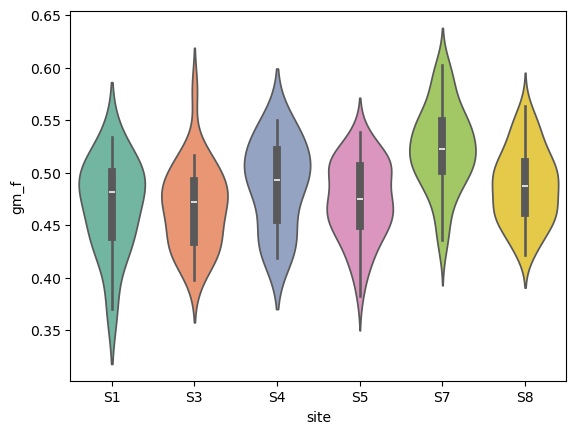

In [38]:
# Create a violin plot
sns.violinplot(x="site", y="gm_f", hue="site", data=bv1, palette="Set2", legend=False)

In [39]:
# Perform one-way ANOVA (Analysis of Variance)
fstat, pval = scipy.stats.f_oneway(*[bv1.gm_f[bv1.site == s]
                                    for s in bv1.site.unique()])

print("Oneway Anova gm_f ~ site F = %.2f, p-value = %E" % (fstat, pval))

Oneway Anova gm_f ~ site F = 14.79, p-value = 1.252503E-12


The F-statistic compares the variance explained by site to the unexplained variance (residual). This higher F-value suggests that the site variable explains a significant amount of variance in gm_f.

The p-value is extremely small (1.25e-12), which is much smaller than the typical significance threshold (e.g., 0.05). This means that the differences in gm_f between the site groups are highly statistically significant. In other words, there is a very low probability that the observed differences between sites are due to random chance.

#### Stats with statsmodels

In [42]:
# Fit an OLS (Ordinary Least Squares) regression model to the data
anova = smfrmla.ols("gm_f ~ site", data=bv1).fit()

# Print the percentage of variance in 'gm_f' explained by 'site'
print("Site explains %.2f%% of the grey matter fraction variance\n" % (anova.rsquared * 100))

# Perform ANOVA (Analysis of Variance) on the fitted model using Type 2 sum of squares
print(sm.stats.anova_lm(anova, typ=2),'\n')

Site explains 23.78% of the grey matter fraction variance

            sum_sq     df          F        PR(>F)
site      0.109005    5.0  14.791967  1.252503e-12
Residual  0.349300  237.0        NaN           NaN 



The R-squared value is 0.2378, meaning that 23.78% of the variance in the grey matter fraction (gm_f) is explained by differences across the site variable (which likely represents different locations, studies, or regions).

This is a moderate proportion of explained variance, suggesting that site plays a significant role in explaining differences in the grey matter fraction but does not account for all variability.

### 2. Test the association between the age and gray matter atrophy in the control and patient population independently.

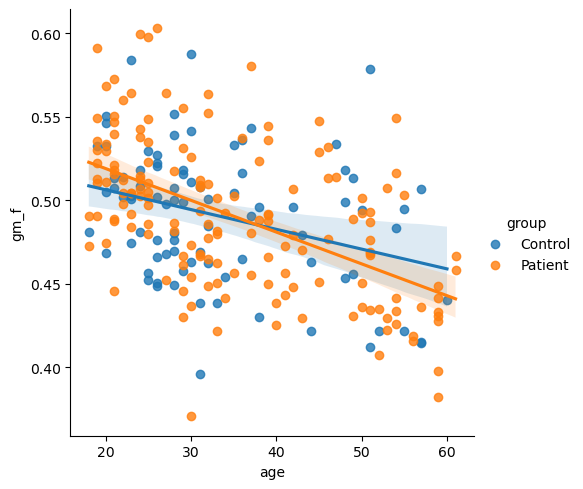

In [45]:
# Use keyword arguments for x and y
sns.lmplot(x="age", y="gm_f", hue="group", data=bv1)

# Subset the data into Control and Patient groups
bv1_ctl = bv1[bv1.group == "Control"]
bv1_pat = bv1[bv1.group == "Patient"]

#### Stats with scipy

In [47]:
print("--- In control population ---")
beta, beta0, r_value, p_value, std_err = scipy.stats.linregress(x=bv1_ctl.age, y=bv1_ctl.gm_f)
print("gm_f = %f * age + %f" % (beta, beta0))
print("Corr: %f, r-squared: %f, p-value: %f, std_err: %f\n" % (r_value, r_value**2, p_value, std_err))

print("--- In patient population ---")
beta, beta0, r_value, p_value, std_err = scipy.stats.linregress(x=bv1_pat.age, y=bv1_pat.gm_f)
print("gm_f = %f * age + %f" % (beta, beta0))
print("Corr: %f, r-squared: %f, p-value: %f, std_err: %f\n" % (r_value, r_value**2, p_value, std_err))

--- In control population ---
gm_f = -0.001183 * age + 0.529944
Corr: -0.325877, r-squared: 0.106196, p-value: 0.002200, std_err: 0.000375

--- In patient population ---
gm_f = -0.001901 * age + 0.556999
Corr: -0.529346, r-squared: 0.280207, p-value: 0.000000, std_err: 0.000245



##### Age-related decline in grey matter:

Both groups show a negative relationship between age and grey matter fraction (gm_f), indicating that grey matter decreases with age.
The decline is stronger in patients than in the control population, as indicated by the steeper slope and higher correlation in the patient group.

##### Explained Variance (R-squared):

Age explains a much larger proportion of the variance in grey matter fraction in the patient group (28.02%) compared to the control group (10.62%), suggesting that age may play a more critical role in brain changes in the patient population.

##### Statistical Significance:

The relationships are statistically significant in both groups, but the association is much stronger in patients.

##### Interpretation:

The stronger age-related decline in grey matter fraction in patients might suggest that age has a more pronounced effect on brain changes in this population, potentially due to the underlying condition they suffer from. In contrast, the control group shows a less steep decline with age, indicating that normal aging has a smaller effect on grey matter compared to the patient group. Decrease seems faster in patient than in control population.

#### Stats with Statsmodels

In [50]:
print("\n-------------------- IN CONTROL POPULATION ------------------------")  
lr = smfrmla.ols("gm_f ~ age", bv1_ctl).fit()  # Fit an OLS regression model with 'gm_f' as dependent and 'age' as independent variable
print(lr.summary())                            # Print the full summary of the regression results
print("Age explains %.2f%% of the grey matter fraction variance" % 
      (lr.rsquared * 100))                     # Print the percentage of variance in 'gm_f' explained by 'age' in the control group
print()  

print("\n--------------------- IN PATIENT POPULATION ------------------------")  
lr = smfrmla.ols("gm_f ~ age", bv1_pat).fit()  # Fit an OLS regression model with 'gm_f' as dependent and 'age' as independent variable
print(lr.summary())                            # Print the full summary of the regression results
print("Age explains %.2f%% of the grey matter fraction variance" % 
      (lr.rsquared * 100))                     # Print the percentage of variance in 'gm_f' explained by 'age' in the patient group
print()


-------------------- IN CONTROL POPULATION ------------------------
                            OLS Regression Results                            
Dep. Variable:                   gm_f   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     9.980
Date:                Fri, 13 Sep 2024   Prob (F-statistic):            0.00220
Time:                        11:06:13   Log-Likelihood:                 159.38
No. Observations:                  86   AIC:                            -314.8
Df Residuals:                      84   BIC:                            -309.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

#### 3. Test for differences of atrophy between the patients and the controls

Before testing for differences of atrophy between the patients ans the controls **Preliminary tests
for age x group effect** (patients would be older or younger than Controls)

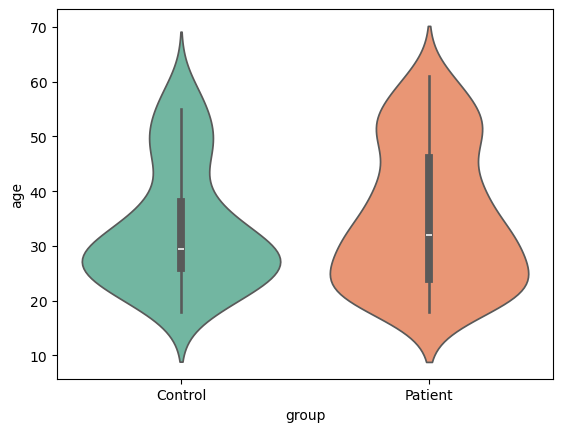

In [53]:
# Create a violin plot
sns.violinplot(x="group", y="age", hue="group", data=bv1, palette="Set2", legend=False);

#### Stats with scipy

In [55]:
t_statistic, pvalue = scipy.stats.ttest_ind(bv1_ctl.age, bv1_pat.age)

print(f"t-statistic: {t_statistic:.4f}, p-value: {pvalue:.4f}")

t-statistic: -1.2156, p-value: 0.2253


#### Stats with statsmodels

In [57]:
# Fit an OLS model where 'age' is the dependent variable and 'group' is the independent variable
result = smfrmla.ols("age ~ group", data=bv1).fit()

# Print the summary of the regression results
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.478
Date:                Fri, 13 Sep 2024   Prob (F-statistic):              0.225
Time:                        11:06:13   Log-Likelihood:                -949.69
No. Observations:                 243   AIC:                             1903.
Df Residuals:                     241   BIC:                             1910.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           33.2558      1.305  

##### Conclusion:
The model suggests that there is no significant difference in age between the Control and Patient groups (p-value = 0.225), and the grouping variable explains very little of the variation in age (R-squared = 0.006). No significant difference in age between patients and controls.

### 4. Test for interaction between age and clinical status, ie: is the brain atrophy process in patient population faster than in the control population.

In [116]:
# Create a contingency table (cross-tabulation) between 'sex' and 'group'
crosstab = pd.crosstab(bv1['sex'], bv1['group'])
print("Observed contingency table")  
print(crosstab)                     
print()

Observed contingency table
group  Control  Patient
sex                    
F           33       55
M           53      102



In [118]:
# Perform a Chi-square test of independence on the contingency table
chi2, pval, dof, expected = scipy.stats.chi2_contingency(crosstab)

# Print the Chi-square statistic and p-value
print("Chi2 = %f, pval = %f" % (chi2, pval))
print()

# Print the expected contingency table under the null hypothesis
print("Expected contingency table under the null hypothesis")
print(expected.round(2))
print()

Chi2 = 0.143253, pval = 0.705068

Expected contingency table under the null hypothesis
[[ 31.14  56.86]
 [ 54.86 100.14]]



#### Calculating Expected Values:

##### ----------- For Females (F) -----------:
Row total (Females): 33+55=88

Column totals:

    Control Group: 33 + 53 = 86

    Patient Group: 55 + 102 = 157

    Grand total: 86 + 157 = 243

Expected count for **Females in Control Group**:

            * Expected (Females, Control) = (88 × 86)/243 = 31.14

So, we expect around 31.14 females in the control group under the assumption of independence.

Expected count for **Females in Patient Group**:

            * Expected (Females, Patient) = (88 × 157)/243 = 56.86

So, we expect around 56.86 females in the patient group under the assumption of independence.


##### ----------- For Males (M) -----------:
Row total (Males): 53+102=155

Column totals:

    Control Group: 86

    Patient Group: 157

    Grand total: 243

Expected count for **Males in Control Group**:

        * Expected (Males, Control) = (155 × 86)/243 = 54.86

So, we expect around 54.86 males in the control group under the assumption of independence.

Expected count for **Males in Patient Group**:

        * Expected (Males, Patient) = (155 × 157)/243 = 100.14

So, we expect around 100.14 males in the patient group under the assumption of independence.

#### Conclusion:

**The expected values are the theoretical counts you would see in each cell of the table if sex and group were independent.
These values serve as a comparison against the observed values in the actual data.
The Chi-square test uses the difference between the observed and expected values to determine whether there is a statistically significant association between the two variables.** 

In this case:

The observed counts for both males and females are quite close to the expected counts under the null hypothesis, which suggests that there may not be a significant relationship between sex and group.
This leads to the **Chi-square statistic being low** and the **p-value being high**, indicating that we do not have sufficient evidence to reject the null hypothesis (i.e., there is no significant association between sex and group).

*No significant difference in sex between patients and controls.*

#### Test for differences of atrophy between the patients and the controls

In [140]:
print(sm.stats.anova_lm(smfrmla.ols("gm_f ~ group", data=bv1).fit(), typ=2))

            sum_sq     df         F    PR(>F)
group     0.000018    1.0  0.009723  0.921532
Residual  0.458286  241.0       NaN       NaN


In [ ]:
This model is simplistic we should adjust for age and site